# Why not Linear regression
Lets take a classification example where we try to classify a person as obese or not given the weight

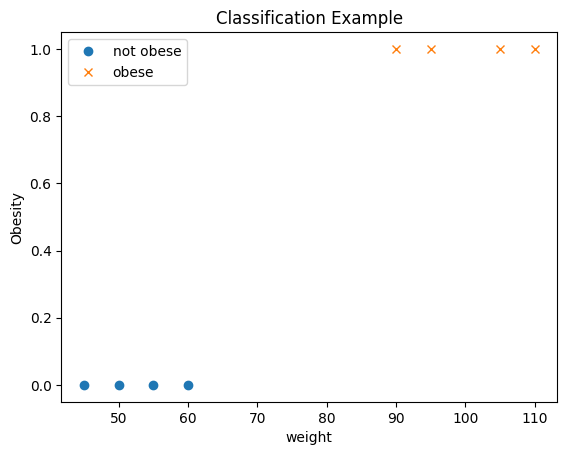

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#data points for class '0' (not obese)
x0=[45,50,55,60]
y0=[0,0,0,0]

#data points for class '1' (obese)
x1=[90, 95, 105, 110]
y1=[1,1,1,1]

# Plot the data points
plt.plot(x0,y0, marker='o', linestyle='', label='not obese')
plt.plot(x1,y1, marker='x', linestyle='', label='obese')

# Set plot labels and title
plt.ylabel('Obesity')
plt.xlabel('weight')
plt.title('Classification Example')

# Add legend
plt.legend()

# Show the plot
plt.show()


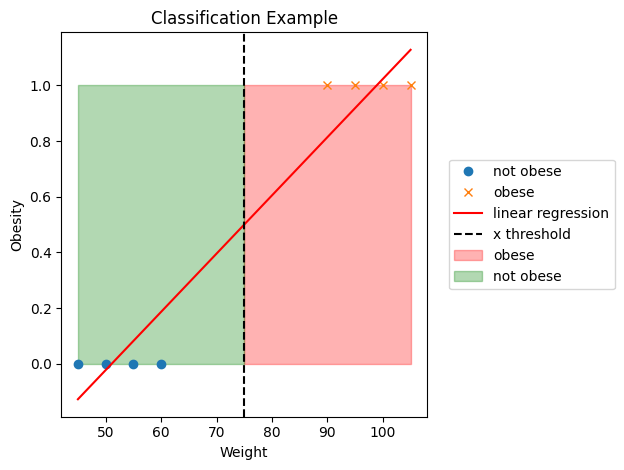

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the data points
x0 = [45, 50, 55, 60]
y0 = [0, 0, 0, 0]

x1 = [90, 95, 100, 105]
y1 = [1, 1, 1, 1]

# Combine the data points
X = np.concatenate([x0, x1]).reshape(-1, 1)
y = np.concatenate([y0, y1])

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions using the linear regression model
X_pred = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Plot the data points
plt.plot(x0, y0, marker='o', linestyle='', label='not obese')
plt.plot(x1, y1, marker='x', linestyle='', label='obese')

# Plot the linear regression line
plt.plot(X_pred, y_pred, color='r', label='linear regression')

# Find the x-value corresponding to y=0.5
x_threshold = (0.5 - model.intercept_) / model.coef_

# Add a vertical line at the x-value corresponding to y=0.5
plt.axvline(x=x_threshold[0], color='k', linestyle='--', label='x threshold')

# Fill the regions on each side of the threshold line
plt.fill_betweenx([0, 1], x_threshold[0], max(X_pred), color='red', alpha=0.3, label='obese')
plt.fill_betweenx([0, 1], min(X_pred), x_threshold[0], color='green', alpha=0.3, label='not obese')

# Set plot labels and title
plt.ylabel('Obesity')
plt.xlabel('Weight')
plt.title('Classification Example')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left')

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()


Now lets fit a sigmoid curve through the data points


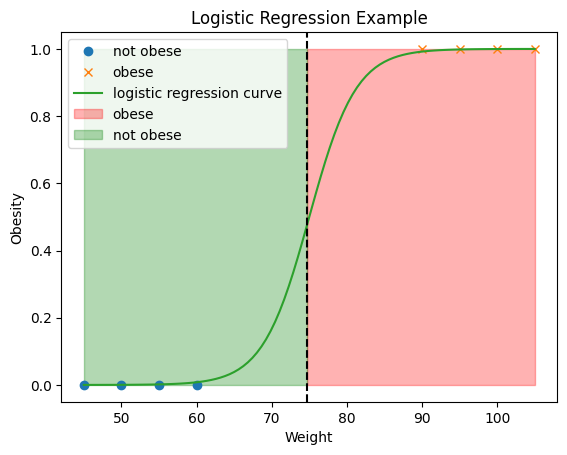

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define the data points
x0 = [45, 50, 55, 60]
y0 = [0, 0, 0, 0]

x1 = [90, 95, 100, 105]
y1 = [1, 1, 1, 1]


# Define the input data
x = np.array(x0 + x1).reshape(-1, 1)
y = np.array(y0 + y1)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(x, y)

# Generate the curve points for plotting
x_curve = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_curve = model.predict_proba(x_curve)[:, 1]

# Plot the data points
plt.plot(x0, y0, marker='o', linestyle='', label='not obese')
plt.plot(x1, y1, marker='x', linestyle='', label='obese')

# Plot the logistic regression curve
plt.plot(x_curve, y_curve, label='logistic regression curve')

# Set plot labels and title
plt.ylabel('Obesity')
plt.xlabel('Weight')
plt.title('Logistic Regression Example')



# Find the x value corresponding to y=0.5(threshold)
x_threshold = x_curve[np.where(np.abs(y_curve - 0.5) == np.min(np.abs(y_curve - 0.5)))][0]

# Draw the vertical line
plt.axvline(x=x_threshold, color='black', linestyle='--')

# Fill the regions on each side of the threshold line
plt.fill_betweenx([0, 1], x_threshold[0], max(x_curve), color='red', alpha=0.3, label='obese')
plt.fill_betweenx([0, 1], min(x_curve), x_threshold[0], color='green', alpha=0.3, label='not obese')

# Add legend
plt.legend()

# Show the plot
plt.show()


#  Cost function

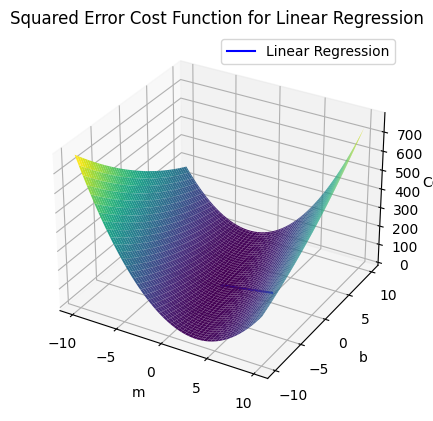

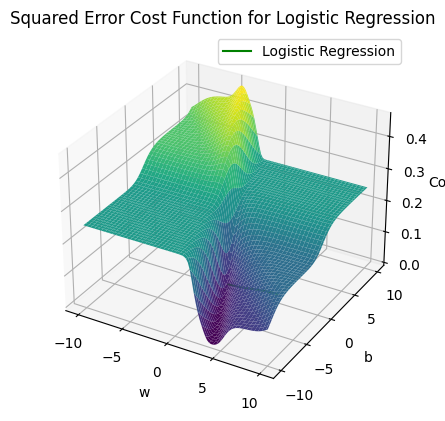

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

def squared_error_cost_linear(m, b, x, y):
    n = len(x)
    cost = 0.0
    for i in range(n):
        y_pred = m * x[i] + b
        cost += (y_pred - y[i]) ** 2
    cost /= (2 * n)
    return cost

def squared_error_cost_logistic(w, b, x, y):
    m = len(x)
    cost = 0.0
    for i in range(m):
        z = w * x[i] + b
        y_pred = 1 / (1 + np.exp(-z))
        cost += (y_pred - y[i]) ** 2
    cost /= (2 * m)
    return cost

def plot_squared_error_cost_linear(x_train, y_train):
    m_range = np.linspace(-10, 10, 100)
    b_range = np.linspace(-10, 10, 100)
    M, B = np.meshgrid(m_range, b_range)
    J = np.zeros_like(M)

    for i in range(len(m_range)):
        for j in range(len(b_range)):
            J[i, j] = squared_error_cost_linear(M[i, j], B[i, j], x_train, y_train)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, J, cmap='viridis')
    ax.set_xlabel('m')
    ax.set_ylabel('b')
    ax.set_zlabel('Cost')
    ax.set_title('Squared Error Cost Function for Linear Regression')

def plot_squared_error_cost_logistic(x_train, y_train):
    w_range = np.linspace(-10, 10, 100)
    b_range = np.linspace(-10, 10, 100)
    W, B = np.meshgrid(w_range, b_range)
    J = np.zeros_like(W)

    for i in range(len(w_range)):
        for j in range(len(b_range)):
            J[i, j] = squared_error_cost_logistic(W[i, j], B[i, j], x_train, y_train)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, J, cmap='viridis')
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('Cost')
    ax.set_title('Squared Error Cost Function for Logistic Regression')

# Sample data
x_train = np.array([0, 1, 2, 3, 4, 5], dtype=np.longdouble).reshape(-1, 1)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.longdouble)

# Linear Regression using scikit-learn
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# Logistic Regression using scikit-learn
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

# Plotting the results
plot_squared_error_cost_linear(x_train, y_train)

plt.plot(x_train, linear_reg.predict(x_train), color='blue', label='Linear Regression')
plt.legend()

plot_squared_error_cost_logistic(x_train, y_train)

plt.plot(x_train, logistic_reg.predict_proba(x_train)[:, 1], color='green', label='Logistic Regression')
plt.legend()

plt.show()


# Logistic Regression Implementation from Scratch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/framingham.csv')
df.head()



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  #(df - df.min()) / (df.max() - df.min())

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Replace missing values with a specific value
df = df.fillna(0)


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
#drop the education column
df = df.drop(df.columns[2], axis=1)



## Train/Validation/Test data
While training the model it is important to split the dataset which we are using. In practise, we split our dataset into three parts train dataset, val dataset and test dataset.
*   Train dataset is used train the model. You know the ground truth and using the ground truths values you can train it.
*   Validation dataset is not used to train the model rather it is used to test the model. The model trains on train dataset and makes predictions on validation dataset.
*   Test dataset is the final dataset on which we expect our model to make predictions.

The difference between validation and test dataset is in validation dataset we are aware of the ground truth values.


In [ ]:
# Extracting features (X) and target variable (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train = X_train.T
Y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = y_test.reshape(1, X_test.shape[1])



print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (14, 3814)
Shape of Y_train :  (1, 3814)
Shape of X_test :  (14, 424)
Shape of Y_test :  (1, 424)


In [ ]:
print(df.head())

   male       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  0.184211            0.0    0.000000     0.0              0.0   
1   0.0  0.368421            0.0    0.000000     0.0              0.0   
2   1.0  0.421053            1.0    0.285714     0.0              0.0   
3   0.0  0.763158            1.0    0.428571     0.0              0.0   
4   0.0  0.368421            1.0    0.328571     0.0              0.0   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0           0.0       0.0  0.149406  0.106383  0.232804  0.277024   0.363636   
1           0.0       0.0  0.242784  0.177305  0.349206  0.319680   0.515152   
2           0.0       0.0  0.234295  0.208038  0.338624  0.237518   0.313131   
3           1.0       0.0  0.200340  0.314421  0.497354  0.316045   0.212121   
4           0.0       0.0  0.302207  0.219858  0.380952  0.183228   0.414141   

    glucose  TenYearCHD  
0  0.104520         0.0  
1  0.101695         0.0  
2 

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def model(X, Y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.random.randn(n, 1)
    B = 0

    cost_list = []

    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        cost = -(1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

        # Gradient Descent
        dW = (1/m) * np.dot(A-Y, X.T)
        dB = (1/m) * np.sum(A - Y)

        W = W - learning_rate * dW.T
        B = B - learning_rate * dB

        # Keeping track of our cost function value
        cost_list.append(cost)

        if i % (iterations/10) == 0:
            print("cost after", i, "iteration is:", cost)

    return W, B, cost_list

def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")

In [ ]:
iterations = 100000
learning_rate = 0.0001
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after 0 iteration is: 0.5564211114252597
cost after 10000 iteration is: 0.5510603963506312
cost after 20000 iteration is: 0.5458758525751043
cost after 30000 iteration is: 0.5408634606860117
cost after 40000 iteration is: 0.5360198231841624
cost after 50000 iteration is: 0.5313418220451096
cost after 60000 iteration is: 0.5268264107945775
cost after 70000 iteration is: 0.522470492580523
cost after 80000 iteration is: 0.5182708532897067
cost after 90000 iteration is: 0.514224129861201


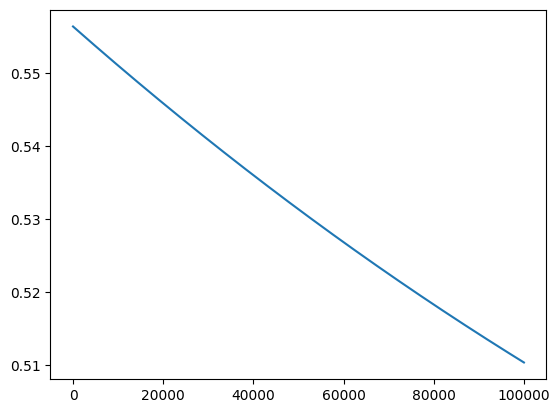

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [ ]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  84.43 %


In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0.0


# Logistic Regression Implementation using scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create an instance of the logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model is:", round(accuracy * 100, 2), "%")


Accuracy of the model is: 85.38 %
